In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
timing = {
    10: [3, 3, 2, 15, 3],
    15: [4, 6, 4, 7, 8],
    21: [2500, 1300, 7, 6, 8],
    35: [295, 141, 951, 131, 304],
    60: [3100, 5100, 6900, 4500, 3600],
    72: [7200, 7600, 7500, 3400, 5400],
    100: [5973600, 9800, 37600, 10900, 57500],
    144: [59600, 74900, 73200, 75900, 65300]
}
density = {
    10: [0.29, 0.33, 0.29, 0.33, 0.29],
    15: [0.25, 0.31, 0.36, 0.31, 0.38],
    21: [0.19, 0.3, 0.27, 0.19, 0.19],
    35: [0.16, 0.21, 0.19, 0.21, 0.15],
    60: [0.19, 0.21, 0.21, 0.25, 0.12],
    72: [0.16, 0.24, 0.17, 0.1, 0.18],
    100: [0.19, 0.19, 0.13, 0.22, 0.21],
    144: [0.13, 0.13, 0.13, 0.13, 0.13]
}
timings = pd.DataFrame.from_dict(timing, orient='index')
densities = pd.DataFrame.from_dict(density, orient='index')
per_letter = pd.DataFrame(data=timings.to_numpy()/(timings.index.to_numpy()[:, np.newaxis]), index=timings.index)

In [3]:
timings['avg'] = timings.mean(axis=1)
timings['std_dev'] = timings.std(axis=1)
densities['avg'] = densities.mean(axis=1)
densities['std_dev'] = densities.std(axis=1)
per_letter['avg'] = per_letter.mean(axis=1)
per_letter['std_dev'] = per_letter.std(axis=1)

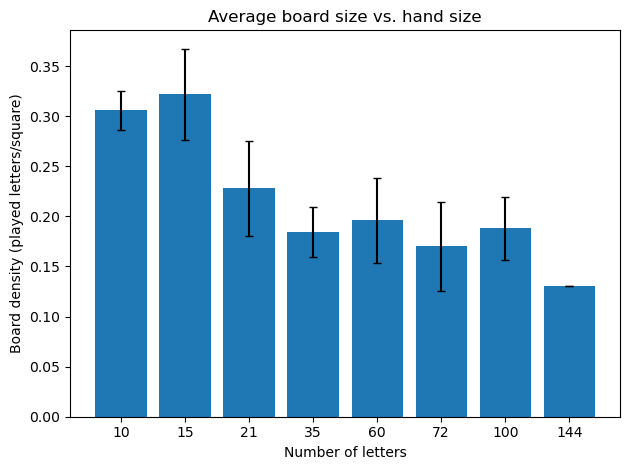

In [4]:
plt.bar(np.arange(len(densities.index)), densities['avg'])
plt.errorbar(np.arange(len(densities.index)), densities['avg'], yerr=densities['std_dev'], fmt='none', capsize=3, color='k')
plt.xticks(np.arange(len(densities.index)), labels=densities.index)
plt.xlabel('Number of letters')
plt.ylabel('Board density (played letters/square)')
plt.title('Average board size vs. hand size')
plt.tight_layout()
plt.savefig('average_board_density.png', dpi=300)

In [5]:
x = np.repeat(densities.index.to_numpy(), 5)
y = densities.iloc[:, :5].to_numpy().ravel()
m, b = np.polyfit(x, y, 1)

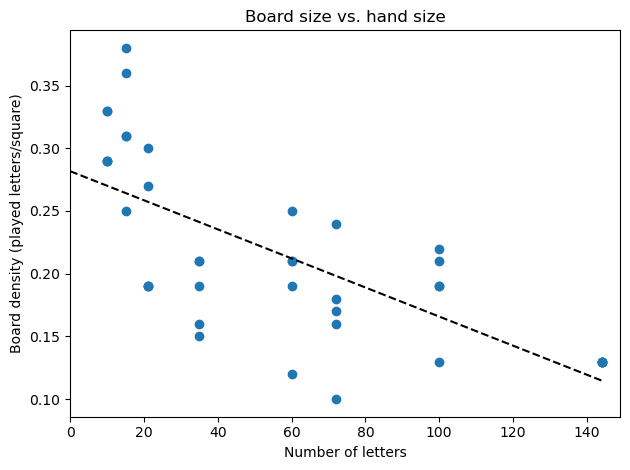

In [6]:
plt.scatter(np.repeat(densities.index.to_numpy(), 5), densities.iloc[:, :5].to_numpy().ravel())
plt.plot([0, 144], [b, m*144+b], '--k')
plt.xlim(0, max(densities.index)+5)
plt.xlabel('Number of letters')
plt.ylabel('Board density (played letters/square)')
plt.title('Board size vs. hand size')
plt.tight_layout()
plt.savefig('board_density.png', dpi=300)

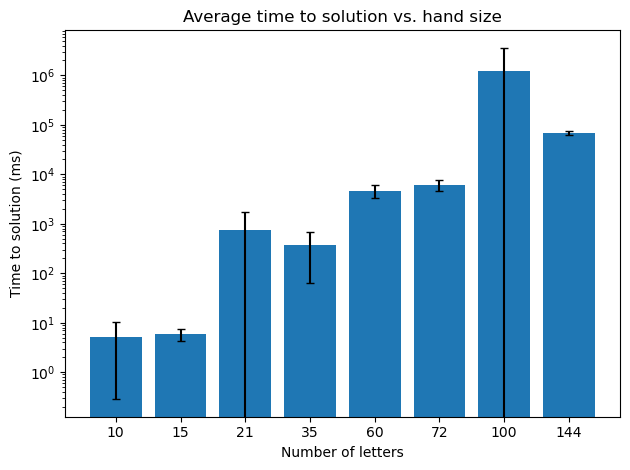

In [7]:
plt.bar(np.arange(len(timings.index)), timings['avg'])
plt.errorbar(np.arange(len(timings.index)), timings['avg'], yerr=timings['std_dev'], fmt='none', capsize=3, color='k')
plt.xticks(np.arange(len(timings.index)), labels=timings.index)
plt.yscale('log')
plt.xlabel('Number of letters')
plt.ylabel('Time to solution (ms)')
plt.title('Average time to solution vs. hand size')
plt.tight_layout()
plt.savefig('average_time_to_solution.png', dpi=300)

In [8]:
x1 = np.repeat(timings.index.to_numpy(), 5)
y1 = timings.iloc[:, :5].to_numpy().ravel()
x1 = x1[:,np.newaxis]
m1, _, _, _ = np.linalg.lstsq(x1, y1)
m1

C:\Users\willd\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


array([3194.12929585])

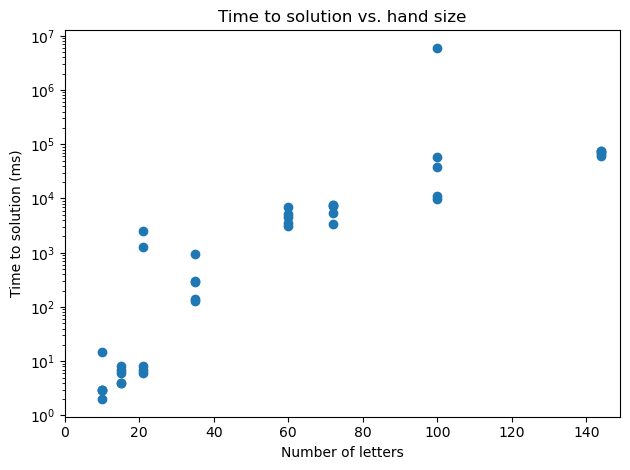

In [9]:
plt.scatter(np.repeat(timings.index.to_numpy(), 5), timings.iloc[:, :5].to_numpy().ravel())
plt.xlim(0, max(timings.index)+5)
plt.yscale('log')
plt.xlabel('Number of letters')
plt.ylabel('Time to solution (ms)')
plt.title('Time to solution vs. hand size')
plt.tight_layout()
plt.savefig('time_to_solution.png', dpi=300)

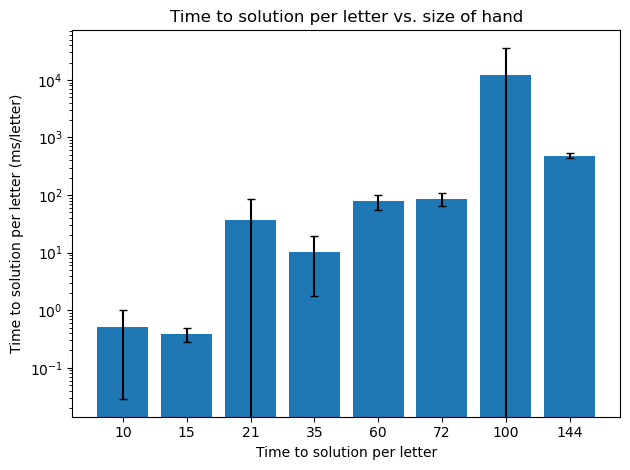

In [10]:
plt.bar(np.arange(len(per_letter.index)), per_letter['avg'])
plt.errorbar(np.arange(len(per_letter.index)), per_letter['avg'], yerr=per_letter['std_dev'], fmt='none', capsize=3, color='k')
plt.xticks(np.arange(len(per_letter.index)), labels=per_letter.index)
plt.yscale('log')
plt.xlabel('Time to solution per letter')
plt.ylabel('Time to solution per letter (ms/letter)')
plt.title('Time to solution per letter vs. size of hand')
plt.tight_layout()
#plt.savefig('average_board_size.png', dpi=300)

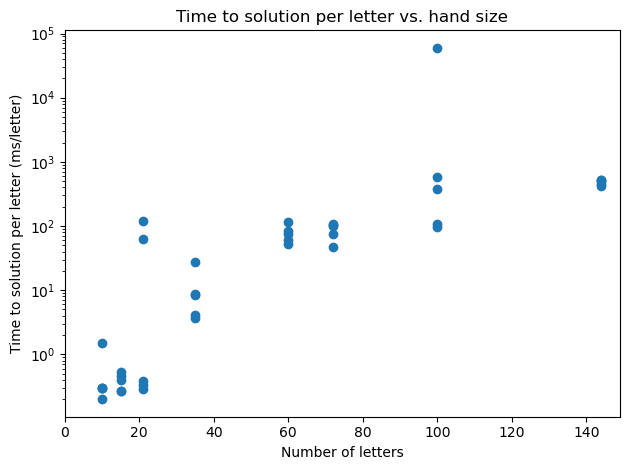

In [11]:
plt.scatter(np.repeat(per_letter.index.to_numpy(), 5), per_letter.iloc[:, :5].to_numpy().ravel())
plt.xlim(0, max(per_letter.index)+5)
plt.yscale('log')
plt.xlabel('Number of letters')
plt.ylabel('Time to solution per letter (ms/letter)')
plt.title('Time to solution per letter vs. hand size')
plt.tight_layout()
#plt.savefig('time_to_solution.png', dpi=300)